In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from matplotlib.colors import LogNorm

In [69]:
pd.set_option('display.max_columns', 500)

In [70]:
pd.__version__

'1.3.0'

In [71]:
FILE_NAME = 'data/singles.pkl'
df = pd.read_pickle(FILE_NAME)

In [72]:
df.head()

,gtid,mcid,subid,inner_hit,inner_hit_prev,id_plus_dr_hit,veto_hit,veto_plus_dr_hit,veto_hit_prev,pe,innerPE,vetoPE,n9,n9_prev,nOff,n100,n100_prev,n400,n400_prev,nX,nX_prev,good_pos,good_pos_prev,good_dir,good_dir_prev,x,y,z,t,u,v,w,azimuth_ks,azimuth_ks_prev,distpmt,mc_energy,mcx,mcy,mcz,mct,mcu,mcv,mcw,closestPMT,closestPMT_prev,dxPrevx,dyPrevy,dzPrevz,drPrevr,drPrevrQFit,dxmcx,dymcy,dzmcz,drmcr,dt_sub,dt_prev_us,timestamp,num_tested,best_like,worst_like,average_like,average_like_05m
0,1,29,0,3,0,0,0,0,0,8.055630,8.055630,0.0,-999999.0,0.0,-999999.0,-999999.0,0.0,-999999.0,0.0,-999999.0,0.0,-999999.99,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,0.0,-999999.99,1.371680,832.672408,4768.790842,-5633.536591,0.0,0.0,0.0,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,1.660608,846.0,846.0,0,0.0,0.0,0.0,0.0
1,2,39,0,3,0,0,0,0,0,5.830416,5.830416,0.0,-999999.0,0.0,-999999.0,-999999.0,0.0,-999999.0,0.0,-999999.0,0.0,-999999.99,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,0.0,-999999.99,0.459479,270.882417,-5657.877508,-3215.295934,0.0,0.0,0.0,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,53.298866,1164.0,1164.0,0,0.0,0.0,0.0,0.0
2,3,42,0,5,0,0,0,0,0,6.651989,6.651989,0.0,-999999.0,0.0,-999999.0,-999999.0,0.0,-999999.0,0.0,-999999.0,0.0,-999999.99,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,0.0,-999999.99,0.600824,5053.693121,-2454.955871,265.023700,0.0,0.0,0.0,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,6.713936,1276.0,1276.0,0,0.0,0.0,0.0,0.0
3,4,58,0,7,0,0,0,0,0,6.121781,6.121781,0.0,-999999.0,0.0,-999999.0,-999999.0,0.0,-999999.0,0.0,-999999.0,0.0,-999999.99,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,0.0,-999999.99,0.542264,3302.081246,4742.522806,2774.122812,0.0,0.0,0.0,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,44.934402,1595.0,1595.0,0,0.0,0.0,0.0,0.0
4,5,89,0,7,0,0,0,0,0,6.689277,6.689277,0.0,-999999.0,0.0,-999999.0,-999999.0,0.0,-999999.0,0.0,-999999.0,0.0,-999999.99,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,0.0,-999999.99,0.000264,395.769915,-5593.270335,-3270.716056,0.0,0.0,0.0,0.0,-999999.99,0.0,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,-999999.99,97.828720,2511.0,2511.0,0,0.0,0.0,0.0,0.0


### Clean out the non-constructed events

In [73]:
def clean_data(df):
    df_cleaned = df[df['azimuth_ks']>=0.]
    print('Initial events: %i\nAfter removing non-triggers: %i'%(len(df), len(df_cleaned)))
    return df_cleaned

In [74]:
df = clean_data(df)

Initial events: 312217
After removing non-triggers: 40550


In [75]:
df.shape

(40550, 62)

In [76]:
# what = df.columns.values
# new_labels = np.asarray([f.decode('utf-8') for f in what])
# df.columns = new_labels

Assuming dimensions of space (x, y, z, r) are in cm

## Dimensions

In [77]:
print(df.keys())

Index(['gtid', 'mcid', 'subid', 'inner_hit', 'inner_hit_prev',
       'id_plus_dr_hit', 'veto_hit', 'veto_plus_dr_hit', 'veto_hit_prev', 'pe',
       'innerPE', 'vetoPE', 'n9', 'n9_prev', 'nOff', 'n100', 'n100_prev',
       'n400', 'n400_prev', 'nX', 'nX_prev', 'good_pos', 'good_pos_prev',
       'good_dir', 'good_dir_prev', 'x', 'y', 'z', 't', 'u', 'v', 'w',
       'azimuth_ks', 'azimuth_ks_prev', 'distpmt', 'mc_energy', 'mcx', 'mcy',
       'mcz', 'mct', 'mcu', 'mcv', 'mcw', 'closestPMT', 'closestPMT_prev',
       'dxPrevx', 'dyPrevy', 'dzPrevz', 'drPrevr', 'drPrevrQFit', 'dxmcx',
       'dymcy', 'dzmcz', 'drmcr', 'dt_sub', 'dt_prev_us', 'timestamp',
       'num_tested', 'best_like', 'worst_like', 'average_like',
       'average_like_05m'],
      dtype='object')


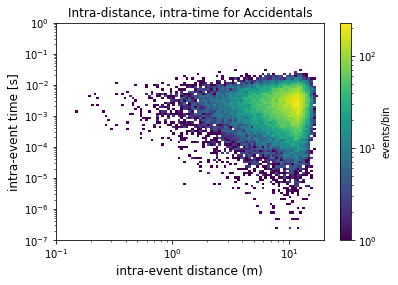

In [78]:
plt.hist2d(df['drPrevr']/1e3, df['dt_prev_us']/1e6, 
          bins=[np.logspace(-1,1.3,100), np.logspace(-7,0,100)], 
          cmin=1, norm=LogNorm()
          )
plt.colorbar(label='events/bin')
plt.xlabel('intra-event distance (m)', fontsize=12)
plt.ylabel('intra-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.title('Intra-distance, intra-time for Accidentals')
plt.show()

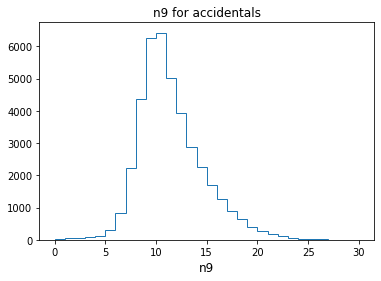

In [79]:
plt.hist(df['n9'], 
         bins=np.linspace(0,30,31), 
        histtype='step', )
plt.xlabel('n9', fontsize=12)
# plt.yscale('log')
plt.title('n9 for accidentals')
plt.show()

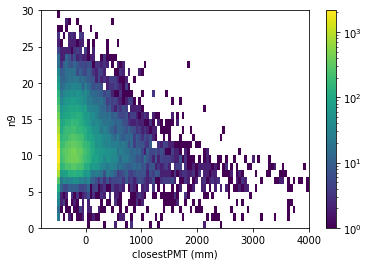

In [59]:
plt.hist2d(df['closestPMT'], df['n9'], 
           bins=[np.linspace(-800,4000,100), np.linspace(0,30,31)],
           cmin=1, norm=LogNorm()
          )
plt.colorbar()
plt.xlabel('closestPMT (mm)')
plt.ylabel('n9')
plt.show()

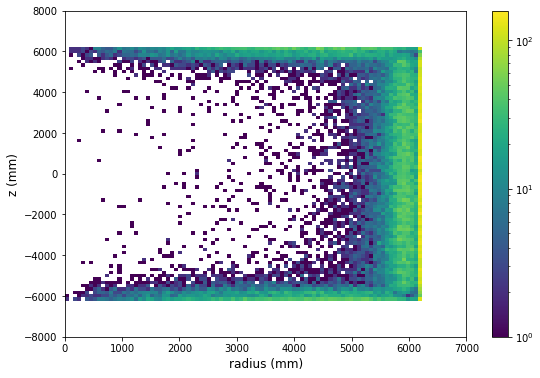

In [64]:
plt.figure(figsize=(9,6))
plt.hist2d(np.sqrt(df['x']**2+df['y']**2), 
            df['z'], 
            cmin=0, norm=LogNorm(), 
            bins=[np.linspace(0,7000,100), np.linspace(-8000,8000,100)]
           )
plt.colorbar()

plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

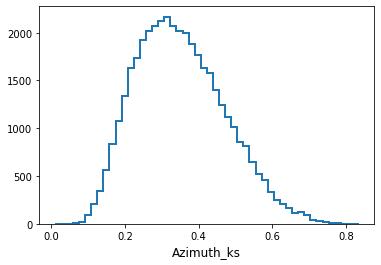

In [81]:
plt.hist(df['azimuth_ks'], bins=50, 
         histtype='step', linewidth=2)
plt.xlabel('Azimuth_ks', fontsize=12)
plt.show()

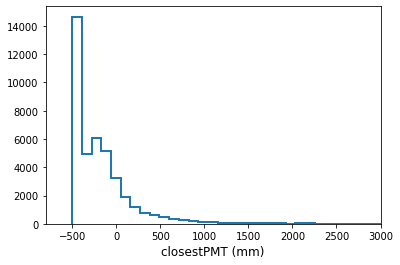

In [82]:
plt.hist(df['closestPMT'], bins=50, 
        histtype='step', linewidth=2)
plt.xlim(-800, 3000)
plt.xlabel('closestPMT (mm)', fontsize=12)
plt.show()

In [ ]:
plt.hist2d(df['drPrevr']/1e3, df['dt_prev_us']/1e6, 
          bins=[np.logspace(-1,1.3,100), np.logspace(-7,0,100)], 
          cmin=1, norm=LogNorm()
          )
plt.colorbar(label='events/bin')
plt.xlabel('inter-event distance (m)', fontsize=12)
plt.ylabel('inter-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.title('Intra-distance, intra-time for Accidentals')
plt.show()

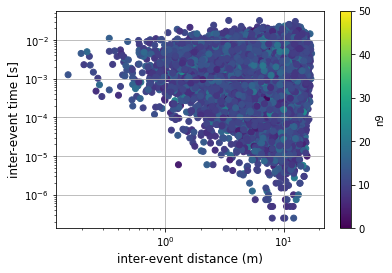

In [16]:
plt.scatter(df['drPrevr']/1e3, df['dt_prev_us']/1e6, 
            c=df['n9'], 
           vmin=0, vmax=50, 
           )
plt.colorbar(label='n9', )
plt.xlabel('inter-event distance (m)', fontsize=12)
plt.ylabel('inter-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid()

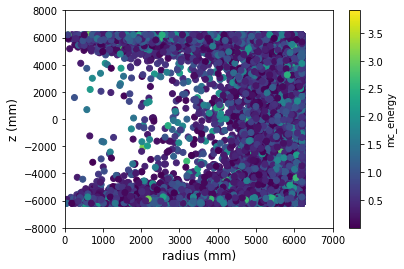

In [60]:
plt.scatter(np.sqrt(df['x']**2+df['y']**2), 
            df['z'], 
            c=df['mc_energy'], #vmin=0, vmax=50
           )
plt.colorbar(label='mc_energy')
plt.xlim(0, 7000)
plt.ylim(-8000, 8000)
plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

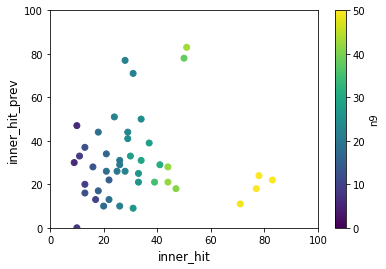

In [72]:
plt.scatter(df['inner_hit'], df['inner_hit_prev'], 
           c=df['n9'], vmin=0, vmax=50)
plt.colorbar(label='n9')
plt.xlabel('inner_hit', fontsize=12)
plt.ylabel('inner_hit_prev', fontsize=12)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

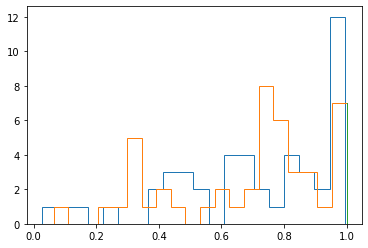

In [76]:
plt.hist(df['w']**2+df['v']**2, bins=20, histtype='step')
plt.hist(df['u']**2+df['v']**2, bins=20, histtype='step')
plt.hist(df['u']**2+df['w']**2+df['v']**2, bins=20, histtype='step')
# plt.xlim(0,1e4)
plt.show()

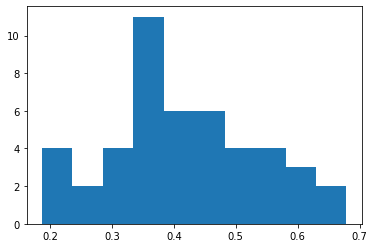

In [64]:
plt.hist(df['good_dir'])
plt.show()

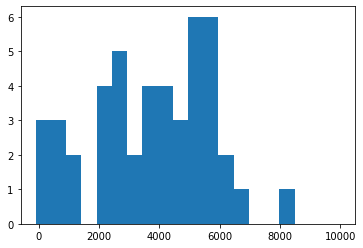

In [27]:
plt.hist(df['drmcr'], bins=20, range=[-1e2,1e4])
# plt.xlim(0,1e4)
plt.show()

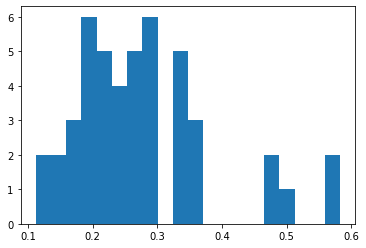

In [29]:
plt.hist(df['azimuth_ks'], bins=20)
# plt.xlim(0,1e4)
plt.show()

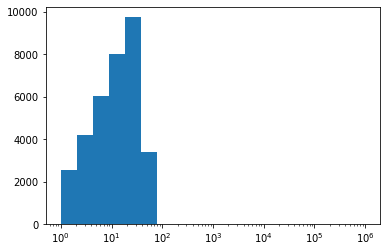

In [83]:
plt.hist(df['dt_sub'], bins=np.logspace(0,6,20))
# plt.xlim(0,1e4)
plt.xscale('log')
plt.show()